## Importing

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading in the preprocessed data

df = pd.read_csv('Star_processed.csv')
df

,Vmag,Plx,Plx_abs,e_plx,B-V,SpType,Distance (pc),abs_Vmag,Target
0,8.93,0.41,0.41,1.14,0.06,A0V,2.44,11.99,0
1,6.44,4.44,4.44,0.51,1.52,K3/K4III,0.23,14.68,1
2,8.77,4.39,4.39,1.16,1.31,K2IIICN...,0.23,16.98,1
3,8.28,5.35,5.35,1.23,1.17,K1III,0.19,16.92,1
4,8.26,9.22,9.22,1.00,0.44,F3V,0.11,18.08,0
...,...,...,...,...,...,...,...,...,...
41745,6.22,12.07,12.07,0.56,0.19,A5V,0.08,16.63,0
41746,8.18,3.43,3.43,0.65,0.07,B9.5IV/V,0.29,15.86,1
41747,8.91,10.52,10.52,0.79,0.70,G3V,0.10,19.02,0
41748,6.70,2.95,2.95,0.56,1.46,K3/K4III,0.34,14.05,1


According to the HR-diagram, the main parameters affecting the luminosity class (dwarf or giant) are the B-V colour and the absolute magnitude. So, making a selection of only the parameters needed.
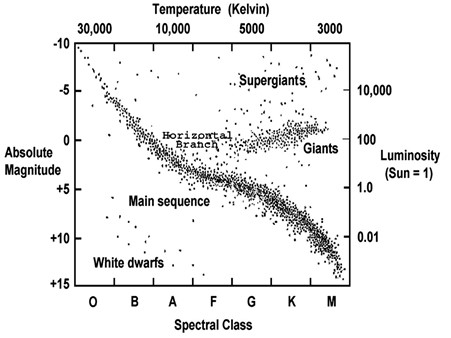

In [3]:
#Necessary columns only

df_new = df[['B-V','abs_Vmag','Target']]
df_new 

,B-V,abs_Vmag,Target
0,0.06,11.99,0
1,1.52,14.68,1
2,1.31,16.98,1
3,1.17,16.92,1
4,0.44,18.08,0
...,...,...,...
41745,0.19,16.63,0
41746,0.07,15.86,1
41747,0.70,19.02,0
41748,1.46,14.05,1


### Standardising

Splitting into training and testing data of 80% and 20% respectively.
The star's class is not dependent on its distance but rather on mass, so in this case using colour and absolute luminosity as absolute mass is hard to acquire. The colour and luminosity depend on mass.

In [4]:
#Random state = 42 to get the same sets across different executions

X = df_new.iloc[:, 0:2] #Output would be dataframe, two columns of colour and magnitude

y = df_new.iloc[:, -1] #Output would be more like an array

from sklearn.model_selection import train_test_split #Importing the data splitting module

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42) #Splitting the data

In [5]:
#Checking that the data is split correctly. It is as expected

print(X_train.shape) #Should be 80% of the data with the 2 columns of colour and magnitude
print(X_test.shape) #Should be 80% of the data containing only the target feature
print(y_train.shape) #Should be 20% of the data containing the 2 columns of colour and magnitude
print(y_test.shape) #Should be 20% of the data containing only the target feature

(33400, 2)
(8350, 2)
(33400,)
(8350,)


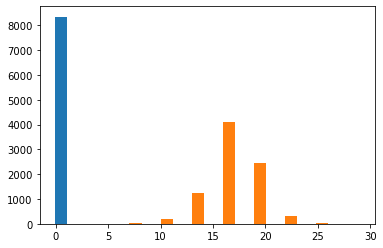

In [6]:
plt.hist(X_test); #Looking how the different features' values are distributed in different scales, so need to standardise

In [7]:
#Creating a standardscaler object and applying it to the data fields used in the modeling

sc_X = StandardScaler() #standardscaler 
sc_X.fit(X_train) #applying the standard scaler to the training data where there is no target feature
X_train = sc_X.transform(X_train) #transforming the training data without the target feature

X_test = sc_X.transform(X_test) #transforming the testing data without the target feature

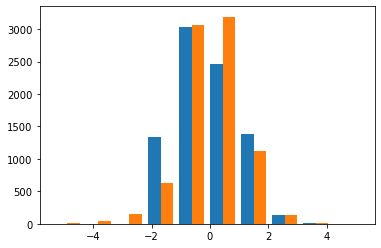

In [8]:
# Standardised data
plt.hist(X_test);

The data has been standardised.

## Modeling KNN

Choosing to try out this model as, according to the HR-diagram, giants and dwarfs clutter in different areas of the diagram. So predictions can be done by looking at what type of datapoints are near in the specific area.

In [9]:
# Calculate k. Number of neighbours to be used in the ML is the square root of the length of the testing data
import math
math.sqrt(len(y_test))

91.37833441248533

91 is odd number so can use that.

In [10]:
# Create KNN Object

classifier = KNeighborsClassifier(n_neighbors=91, p=2, metric= 'euclidean') #91 neigbours, 2 target variables to predict

classifier

# Train model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=91)

### Collecting KNN predictions and evaluating

In [11]:
#Collecting the predictions by using the trained classifier object on the X_testing data
y_pred = classifier.predict(X_test)
#Comparing the predictions to the real values. At first glance, seems to have done well.
y_pred[0:10], y_test[0:10]

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64),
 23641    1
 33447    0
 18399    0
 40725    1
 5920     0
 12705    1
 36110    0
 24919    1
 37683    0
 40311    0
 Name: Target, dtype: int64)

In [12]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[3763,  397],
       [ 982, 3208]], dtype=int64)

So the KNN model put 982 giants under the dwarfs' section and 397 dwarfs in the giants' section.

In [13]:
#Importing recall and precision score as well to see the quality of the data.
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [14]:
# scores

#F1 is a data quality score, combination of recall and precision which were displayed here anyway
print('F1:',f1_score(y_test, y_pred))
#Accuracy shows how many records in the testing data the model got right
print('Accuracy:',accuracy_score(y_test, y_pred))
#How many relevant records are retrieved:
print('Recall:',recall_score(y_test, y_pred))
#How many retrieved records are relevant:
print('Precision:',precision_score(y_test, y_pred))

F1: 0.8230917254650416
Accuracy: 0.8348502994011976
Recall: 0.7656324582338903
Precision: 0.889875173370319


FIXED NOW [According to the evaluations, the model performed with a 100% accuracy and considering there were 8350 datapoints to test on, it cannot be the case of not enough data. Nevertheless, trying out another method. Using only the absolute magnitude. This might be the case of overfitting and as there is definitely enough data to train on (thousands) then removing a feature instead.]

UPDATE on the above: The reason for the 100% accuracy before was because, by accident, the target feature was included in the features which were supposed to help predict, so it already had all the answers and therefore gave them. Luckily, not an overfitting problem and this time have a much more reasonable of 83% accuracy score. Fixed now!

### Calculating if there is a better k-value/number of neighbours to use

In [15]:
error_rate = [] #Finding how high is the error rate of the model choosing the wrong target value. Using a for loop

for i in range(1,150): #range of 150 neighbours
    knn = KNeighborsClassifier(n_neighbors = i) #applying different number of neighbours to the classifier via 'i'
    knn.fit(X_train, y_train) #fitting the classifier with different number of neighbours to the training data
    pred_i = knn.predict(X_test) #collecting the different predictions
    error_rate.append(np.mean(pred_i != y_test)) #Collecting the error rate by finding the mean of number of
    # predictions not equal the target result for every number of neighbours

In [16]:
for index, error in enumerate(error_rate): #Displaying the number of neighbours along with its error rate
    print(index+1, error) #showing them

1 0.22419161676646707
2 0.19904191616766467
3 0.19652694610778443
4 0.18275449101796407
5 0.1852694610778443
6 0.17808383233532935
7 0.1821556886227545
8 0.1777245508982036
9 0.18083832335329342
10 0.17676646706586827
11 0.1770059880239521
12 0.17317365269461077
13 0.17568862275449101
14 0.17233532934131737
15 0.17437125748502993
16 0.17233532934131737
17 0.1740119760479042
18 0.17125748502994012
19 0.17341317365269462
20 0.1711377245508982
21 0.16994011976047904
22 0.1688622754491018
23 0.16910179640718562
24 0.1695808383233533
25 0.17017964071856287
26 0.16778443113772454
27 0.1681437125748503
28 0.1680239520958084
29 0.16790419161676648
30 0.16718562874251497
31 0.1689820359281437
32 0.1667065868263473
33 0.1680239520958084
34 0.1674251497005988
35 0.1688622754491018
36 0.1680239520958084
37 0.1680239520958084
38 0.16850299401197605
39 0.16862275449101796
40 0.1689820359281437
41 0.16826347305389222
42 0.16850299401197605
43 0.16778443113772454
44 0.16850299401197605
45 0.1673053892

Text(0, 0.5, 'Error Rate')

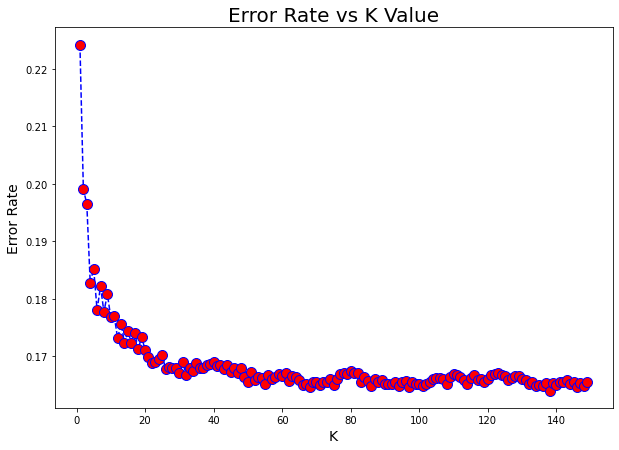

In [17]:
plt.figure(figsize=(10,7)) #setting the figure size
#plotting the plot in the same range as the number of neighbours used before and using the error rate data
plt.plot(range(1,150), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
#Setting the titles and labels
plt.title('Error Rate vs K Value', fontsize=20)
plt.xlabel('K', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)

Choosing another K value will not make much of a difference as the error rate stabilises around 50 neighbours and then has only minor fluctuations.

### Plotting the KNN predictions along with real values

The example of the KNN graph was taken from here: https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


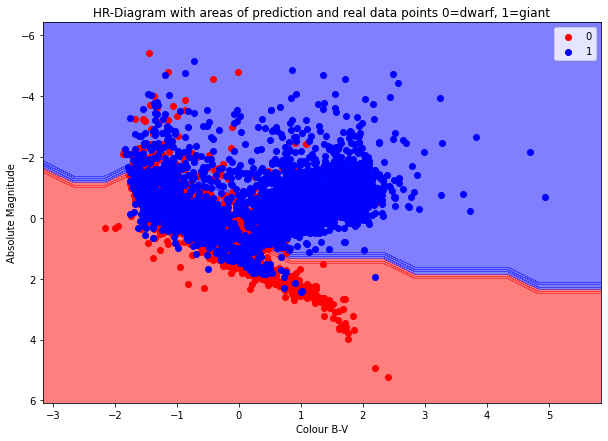

In [18]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
#Imorting the colour map
from matplotlib.colors import ListedColormap

h=0.5 #step size in the mesh
#Setting the min and max for x (star colour) and y(absolute magnitude) axis with the testing data
x_min, x_max = X_test[:,0].min() - 1, X_test[:,0].max() + 1
y_min, y_max = X_test[:,1].min() - 1, X_test[:,1].max() + 1
#Making the grid with the min and max values and naming the axes to xx and yy with step size of 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Making the values into 1d array and then applying .c_ to make present the values in a 2d columns
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into the colour plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7)) #setting the figure size
plt.contourf(xx,yy, Z,alpha = h, cmap = ListedColormap(('red','blue'))) #plotting the contour of the predictions

# Plot also the real values' points in the testing data
for i, j in enumerate (np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],c = ListedColormap(('red','blue'))(i), label = j)
plt.xlabel('Colour B-V') #labeling the axis
plt.ylabel('Absolute Magnitude')#labeling the axis
plt.title('HR-Diagram with areas of prediction and real data points 0=dwarf, 1=giant')


plt.xlim(xx.min(), xx.max()) #the star colour goes from min to max
plt.ylim(yy.max(), yy.min()) #Flipping the magnitude axis as negative value is higher magnitude
plt.legend() #displaying the legend as well


The graph displays "boundaries" because of the nature of the data. HR-diagram naturally has distinct regions of giants and dwarfs. Giants gather in the upper section of the diagram while dwarfs in the bottom. Some giants and dwarfs are in the unexpected regions and overlap with each other which is explained with the confusing labelling in the dataset. This can be examined in the future with more time.

## Modeling Decision Trees

Rather than looking at neighbouring data points, looking into specific values of star colour and absolute magnitude. In theory, if the luminosity class labelling in the data set was more clear (giant/dwarf) then with this model the predictions should be more accurate because it is looking at the actual values and making a decision based on that and not on the neighbours. Luminosity classes have distinct colour and absolute magnitude values so should produce a better model.

In [19]:
#Create decisiontreeclassifier object
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [20]:
#X_train, X_test, y_train, y_test
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of the Trees

In [21]:
y_pred = dtree.predict(X_test) #Collecting predictions

In [22]:
print(classification_report(y_test, y_pred)) #Classification report

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4160
           1       0.79      0.77      0.78      4190

    accuracy                           0.78      8350
   macro avg       0.78      0.78      0.78      8350
weighted avg       0.78      0.78      0.78      8350



In [23]:
pd.crosstab(y_test, y_pred, rownames=['Actual Class'], colnames=['Predicted Class']) #To see how many the model got wrong

Predicted Class,0,1
Actual Class,,
0,3298,862
1,979,3211


The trees method got more wrong as seen by the crosstab report and the accuracy score. The scores are lower than for the k nearest neighbours. It did worse (not by much, only by 4%) because of the unclear labelling again where there were colour and absolute magnitude values of dwarfs and giants similar to each other. The same labelling problem as for the KNN, however, majority of the data points were in the correct area, so KNN found the correct areas of predictions and just put the testing data points of different target in there. For the decision tree, the predictions were confused by the similar colour and magnitude values of dwarfs and giants as well, so more wrong decisions and lower accuracy score.

In [24]:
#Making a new copy of the data to use on the decision trees plot
df_tree =df_new.copy()
df_tree.loc[df_tree["Target"] == 1, "Target"] = 'Giant'
df_tree.loc[df_tree["Target"] == 0, "Target"] = 'Dwarf'
df_tree

,B-V,abs_Vmag,Target
0,0.06,11.99,Dwarf
1,1.52,14.68,Giant
2,1.31,16.98,Giant
3,1.17,16.92,Giant
4,0.44,18.08,Dwarf
...,...,...,...
41745,0.19,16.63,Dwarf
41746,0.07,15.86,Giant
41747,0.70,19.02,Dwarf
41748,1.46,14.05,Giant


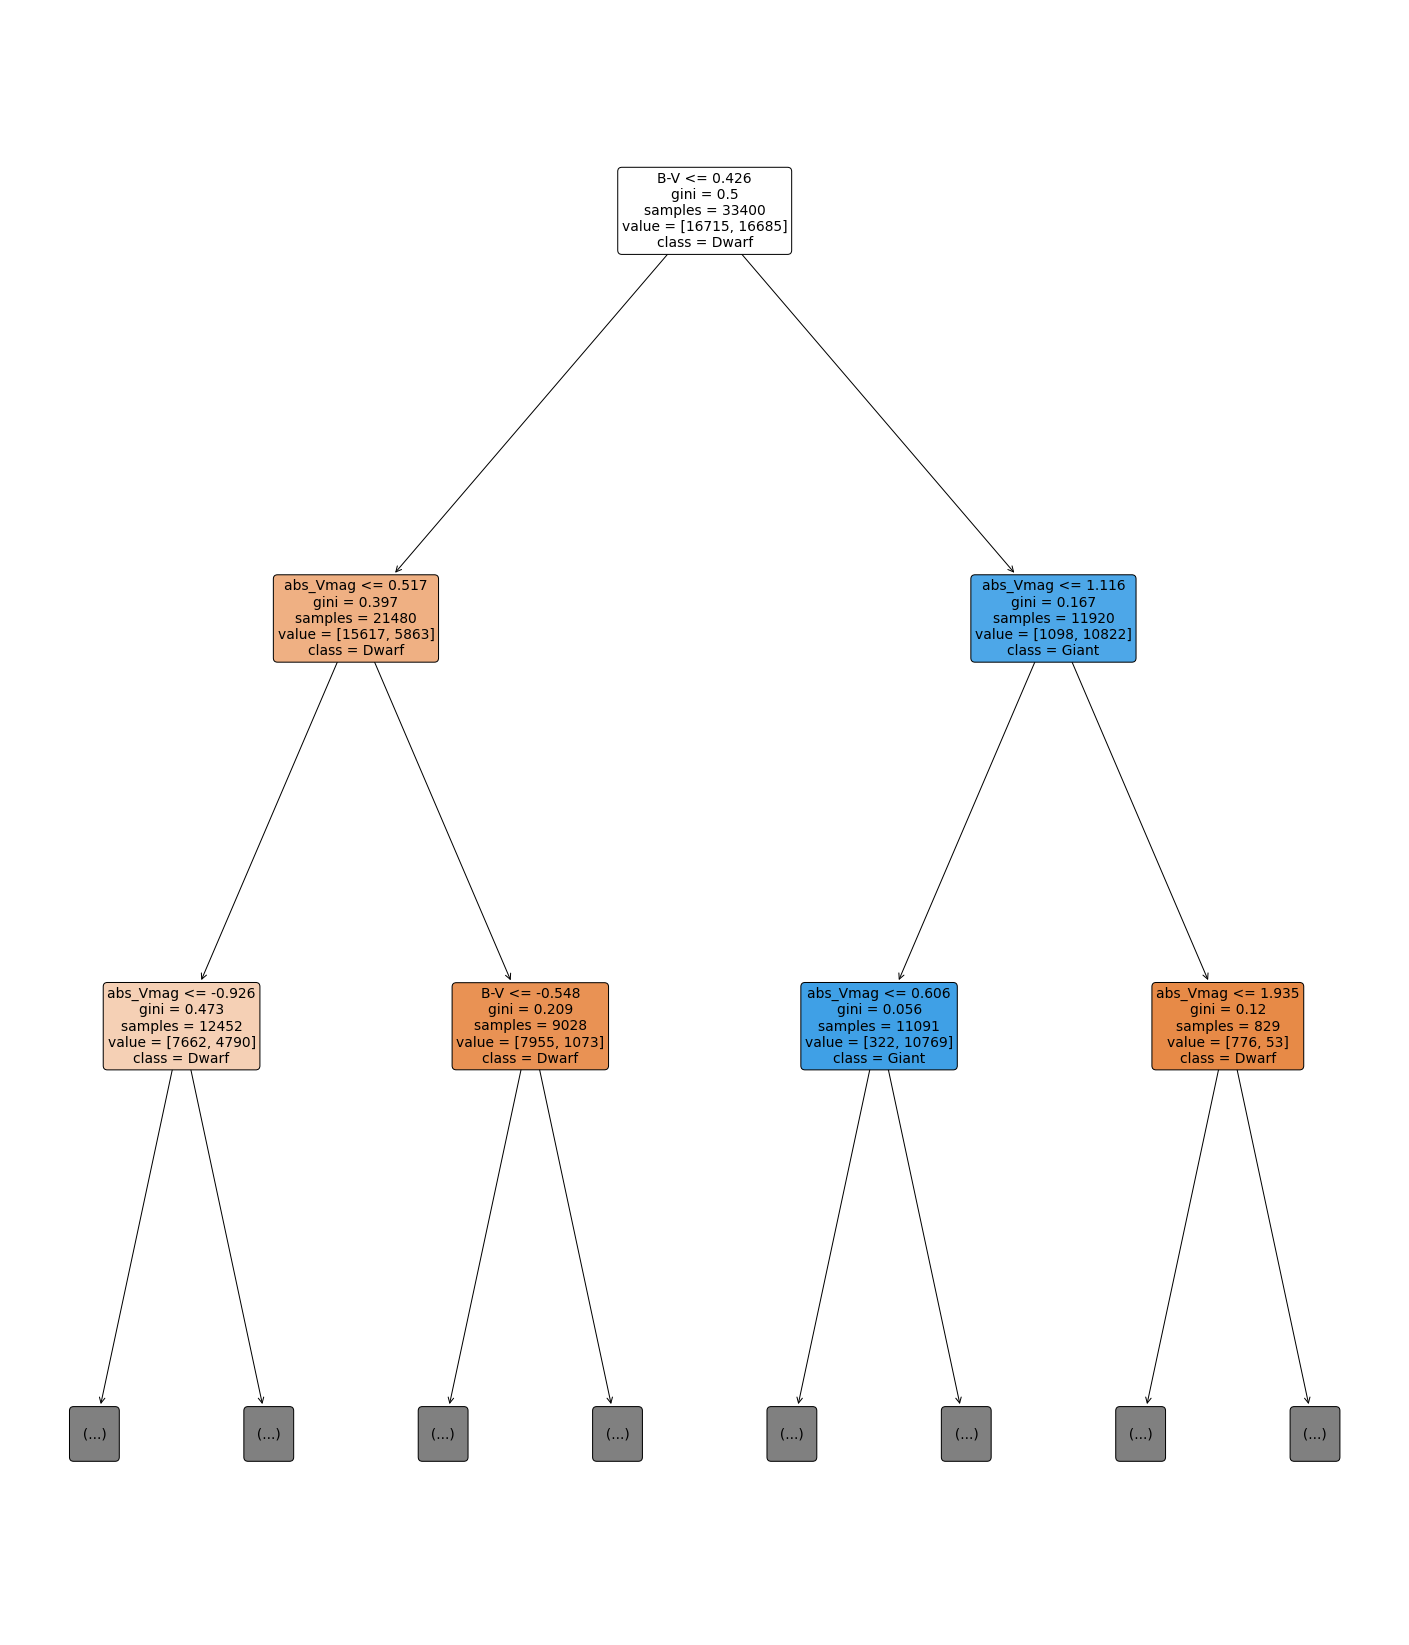

In [25]:
#Visualising how the tree looks

fig = plt.figure(figsize=(25,30)) #setting the figure size

feature_names = df_tree.columns[:2] #picking the star's colour and the absolute magnitude feature
target_names = df_tree['Target'].unique().tolist() #Getting the unique target names of 0=dwarf and 1=giant
#plotting the tree
picture = tree.plot_tree(dtree, #using the tree model 
                         feature_names = feature_names,#features used in modeling 
                         class_names = target_names, #target feature
                         filled = True, #filled nodes
                         rounded = True, #rounded corners
                         max_depth=2) #number of levels of the tree displayed
plt.savefig('tree_visualization.png') #saving the picture of the figure as png

The decision tree starts with looking at the colour value and then narrows the selection down according to the absolute magnitude value.

## Modeling Random Forest

Random forest should perform better than any other models here but will be probably constrained by the unclear labelling again.

In [26]:
# making classifier object

rf = RandomForestClassifier(n_jobs=2, random_state=42) #number of target variables is 2 so n_jobs=2

# training classifier

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=42)

### Collecting Random Forest Predictions and Evaluating

In [27]:
pred_rf = rf.predict(X_test) #collecting predicitons
list(zip(pred_rf, y_test)) #listing them alongside the real values of y test

[(1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 

In [28]:
print(classification_report(y_test, pred_rf)) #classification report

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4160
           1       0.80      0.79      0.79      4190

    accuracy                           0.80      8350
   macro avg       0.80      0.80      0.80      8350
weighted avg       0.80      0.80      0.80      8350



In [29]:
#Cross validation

pd.crosstab(y_test, pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1
Actual Class,,
0,3355,805
1,900,3290


## Conclusions

### Comparison and the constraints

* The random forest did better than the tree. Some of the quality scores (recall) are also doing better for it than for the KNN. The forest guessed more giants correctly but assumed a lot more dwarfs to be giants. As explained before, might not be the model but how a small amount of data has just unclear labelling ("IV/V" - in-between the two stages).

* It does not mean that the source is wrong. It could be that some yellow dwarfs were transforming into red giants. Unfortunately, in real life the stars do not have that clear cut values, measurement errors are made and only really estimations can be made.

* The main constraint of the project was the unclear labelling in the minority of the data. As the majority was in the correct areas, KNN was able to find the correct areas in the HR-diagram, however, failed where the testing data, for example, said dwarf but had measurement values of a giant.

* Decision tree and the random forest, who were looking at the specific values, were, additionally, confused by the similar measurement values of a dwarf and giant in the training section, as well as in the testing section for the same reason.

### Final Values

Models' perfomances:

1. KNN with an accuracy of 83%.
2. Random forest with an accuracy of 80%.
3. Decision tree with an accuracy of 78%.

The models had minor differences in quality but in the case of "pure data" (clear cut values of giants and dwarfs) the decision trees and the random forest are expected to do better than KNN because they would be comparing the specific values of stars' colour and absolute magnitude with the previously tested data. KNN did better, in this case, because of the labelling constraint and it able to find the areas of giants and dwarfs according to the majority of the data.

### Future Work

* In the future, it can be looked into the data set more, how to make a more clear statement of what type of star the object is in the stage of "IV/V". Rather than just giant or dwarf, more specific subcategories like white dwarfs and red giants could be made.

* Also, the other type of stars could be looked into and try to classify them as well.

* New data set of stars' luminosity classes, magnitudes and colour could be collected to evaluate how the models work on the fresh data where the labelling is more clear.